In [12]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
from IPython.core.display import display, HTML
from IPython.display import IFrame, display
import tabulate
display(HTML('<h3>Student: Eduardo S. Ito (RA 159086)</h3>'))
display(HTML('<h3>Student: Thales E. Nazatto (RA 074388)</h3>'))
display(HTML('<h1>Project 2: Evolutionary Computing</h1>'))
from PIL import Image
import os
os.startfile('p2.pdf')
display(HTML('<p>See generated pdf ...</p>'))

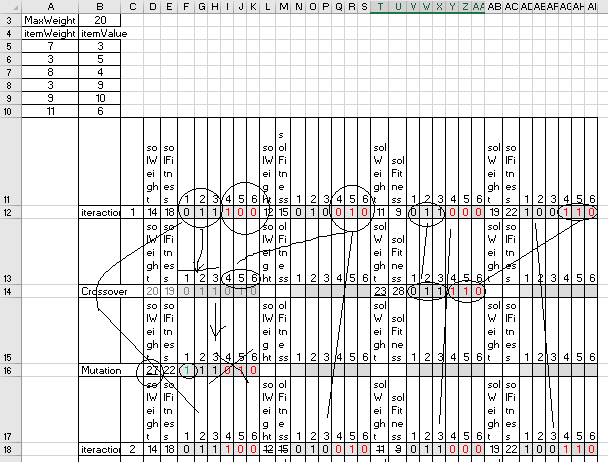

In [2]:
from IPython.core.display import display, HTML
import tabulate
display(HTML('<h2>Abstração Inicial</h2>'))
from PIL import Image
path="abstraction.png"
display(HTML('<p>Conforme referência [1], o problema da mochila (knapsack problem) é um problema de otimização\
               combinatória, cujo objetivo é preencher uma mochila com o maior valor possível, não excedendo a \
               capacidade máxima. A formulação do problema é extremamente simples, porém a solução é mais complexa,\
               inclusive faz parte dos 21 problemas NP-completos de Richard Karp.</p>'))
display(HTML('<p>O modelo evolucionário adotado será o Algoritmo Genético (GA).</p>'))
display(HTML('<p>A implementação foi realizada utilizado mecanismo de OOP (Object Oriented Programming). \
               A definição do problema é tratada pela classe KnapsackProblem (em problem.py), onde a função\
               de fitness está implementada. A geração da população é realizada pela classe GenerationManager \
               (em generation.py). A seleção da população pode ser realizada através de dos seguintes métodos \
               roulette wheel, tournament battle royale e tournament playoff gerenciada pela classe Selection \
               (em selection.py). A reprodução (crossover) pode ser realizada pelo método Asexual, Sexual com \
               apenas um simples ponto, sexual em dois pontos na classe Reproduction (em reproduction.py).\
               A mutação pode ser realizada pelos métodos generative, swap, sequence swap pela classe Mutation \
               (em mutation.py). A controle da geração da nova população bem como encontrar as medidas de fitness, \
               é realizada pela classe GeneticalgorithmFacade (em genetic_algorithm.py). A chamada de execução do \
               algoritmo genético é realizada pelo método run_ga definido aqui no jupyter notebook \
               com entrada de parâmetros número de gerações (generations), que também é o critério de parada,\
               o tamanho da população de cromossomos (population_size), taxa de reprodução \
               (crossover_probability), taxa de mutação (mutation_probability), vetores de valores, custos, pesos e \
               o peso máximo que um repositório pode carregar, pode ser uma mochila, um caminhão, etc.</p>'))
display(HTML('<p>A figura abaixo ilustra como será resolvido um problema em alto nível.</p>'))
display(Image.open(path))


In [3]:
display(HTML('<h2>Modelamento</h2>'))
filepath='modellingClasses.pdf'
os.startfile(filepath)
display(HTML('<p>See generated pdf ...</p>'))
display(HTML('<h2>Solução</h2>'))

In [13]:
from knapsack.generation import GenerationManager, GenerationStrategy
from knapsack.genetic_algorithm import GeneticAlgorithmFacade
from knapsack.mutation import Mutation, MutationStrategy
from knapsack.problem import KnapsackProblem, ProblemType
from knapsack.reproduction import Reproduction, ReproductionStrategy
from knapsack.selection import Selection, SelectionStrategy

class Config:
    def __init__(self):
        pass


def run_ga(generations,population_size,crossover_probability,mutation_probability,values,costs,weights,cargo):

    config=Config
    config.problem=KnapsackProblem(type=ProblemType.MAXIMIZATION,
                    values=values,
                    costs=costs,
                    weights=weights,
                    cargo=cargo)
                                   
    selection=Selection(config.problem, SelectionStrategy.TOURNAMENT_BATTLE_ROYALE)
    reproduction=Reproduction(ReproductionStrategy.SEXUAL_SINGLE_POINT, crossover_probability)
    mutation=Mutation(MutationStrategy.GENERATIVE, mutation_probability)

    config.generation=GenerationManager(config.problem, GenerationStrategy.EXCHANGE, selection, reproduction, mutation)
    config.population_size=population_size
    config.generations=generations

    GeneticAlgorithmFacade(config).execute()
    
def graphics(fileid):
    import csv
    x=[]
    max=[]
    med=[]
    min=[]

    with open(fileid,'rt')as f:
      data = csv.reader(f)
      for row in data:
            x.append(int(row[0]))
            max.append(float(row[1]))
            med.append(float(row[2]))
            min.append(float(row[3]))

    plt.plot(x, max, label="maximum fitness")
    plt.plot(x, med, label="medium fitness")
    plt.plot(x, min, label="minimum fitness")
    plt.legend(loc='lower left')
    plt.ylabel('fitness')
    plt.xlabel('generations')
    plt.title('knapsack problem')
    plt.show()

In [17]:
# Caso 1: Cargo

generations = 100
population_size = 100
crossover_probability = 0.8
mutation_probability = 0.2
values=[0, 1]
costs=[100, 350, 200, 90, 500, 250, 220, 360, 150, 700, 400, 230, 550]
weights=[50, 90, 30, 40, 100, 70, 20, 80, 80, 90, 50, 30, 70]
cargo=600

run_ga(generations,population_size,crossover_probability,mutation_probability,values,costs,weights,cargo)

Processing ...

Best choice: 
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600


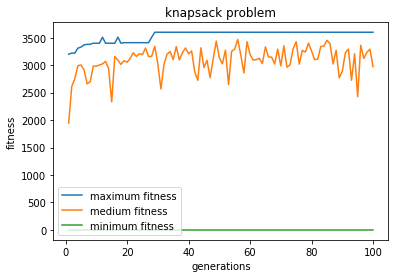

In [18]:
# graphics generation
fileid="file1.txt"
graphics(fileid)

In [21]:
# Caso 2: Knapsack problem

# Knapsack maximum capabilityKnapsack
maxWeight=20

# Product List for Knapsack

generations = 20
population_size = 4
crossover_probability = 0.8
mutation_probability = 0.2
values=[0, 1]
costs=[3, 5, 4, 9, 10, 6]
weights=[7, 3, 8, 3, 9, 11]
cargo=20

run_ga(generations,population_size,crossover_probability,mutation_probability,values,costs,weights,cargo)

Processing ...

Best choice: 
[0, 1, 0, 1, 1, 0] Fitness: 24 Cost: 24 Cargo: 15


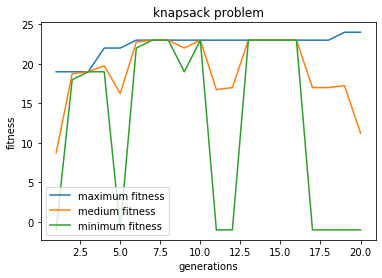

In [22]:
# graphics generation
fileid="file1.txt"
graphics(fileid)

In [9]:
display(HTML('<h3>Referências </h3>'))
display(HTML('<p>[1] https://pt.wikipedia.org/wiki/Problema_da_mochila</p>'))
display(HTML('<p>[2] https://www.youtube.com/watch?v=9kbzMeEBvUY</p>'))